# Device Failure

The purpose of this project is to predict whether a device, which in this case are delivery trucks, requires maintenancing based on previous maintenance data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Exploration

In [2]:
#Reading in CSV
df = pd.read_csv('failures.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null object
device        124494 non-null object
failure       124494 non-null int64
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


With viewing the info, head and tail of the dataset, it is obvious that determining correlation and trends will be difficult since the feature names are not descriptive. For example, we do not know what the values in "attribute1" is for. However, we do have what I consider the devices serial number that is labeled under "device" and the failure results under "failure", which will be our labeled target. 

In [5]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [6]:
#Observing correlations between attributes
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


Identifying if there is any immediate correlation between the attributes (without data manipulation), this correlation table shows that there are no strong correlations between any of the attributes with the exception of the correlation score between "attribute3" and "attribute9": 0.532366.

In [7]:
#Checking for null values
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [8]:
#Checking for duplicated data
df.duplicated().sum()

0

As the codes above showed no data were duplicated, I moved on to reviewing the data by seeing how many duplicated values existed for each feature which I believe will help in understanding which features had sparse patterns.

In [9]:
#Checking the number of duplicates for each feature
col = ['device', 'attribute1', 'attribute2', 
       'attribute3', 'attribute4', 'attribute5', 
       'attribute6', 'attribute7', 'attribute8', 
       'attribute9']

dup = []

for c in col:
    dup.append(df[c].duplicated().sum())

dup_df = pd.DataFrame(columns = ['feature', 'no. duplicated'])
dup_df['feature'] = col
dup_df['no. duplicated'] = dup
    

In [10]:
dup_df

,feature,no. duplicated
0,device,123326
1,attribute1,616
2,attribute2,123936
3,attribute3,124447
4,attribute4,124379
5,attribute5,124434
6,attribute6,79656
7,attribute7,124466
8,attribute8,124466
9,attribute9,124429


The table above aligns with what we saw when we initially reveiwed the dataset's head and tail functions where attributes that were not attribute1 and attribute 6 demonstrated a sparse pattern (mostly repeats of 0s) based on the high number of duplicated values. i also noticed that the device serial numbers had a high number of duplicates, which makes sense as each truck is recorded to be serviced multiple times.

In [11]:
#Checking how many times a device was recorded (in use)
df['device'].value_counts()

S1F0KYCR    304
Z1F0Q8RT    304
Z1F0QL3N    304
Z1F0KJDS    304
S1F0EGMT    304
           ... 
S1F0BN0S      5
Z1F0LJTD      5
W1F0ED5X      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

Through checking the number of times that a serial number is recorded, it is apparent that some devices were serviced significantly more than others. This could be due to some devices traveling longer distances than others, are older than others, or not receiving more maintenance than others. Anyways, I went ahead and selected the first serial number, W1F0JXDL, with the highest number of counts from the result above to further investigate. 

In [12]:
#Selecting data for a random device with the highest amount of records
df[df['device'] == 'W1F0JXDL']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
589,2015-01-01,W1F0JXDL,0,233729960,16,0,0,7,198059,0,0,0
1752,2015-01-02,W1F0JXDL,0,8791896,16,0,0,7,199406,0,0,0
2915,2015-01-03,W1F0JXDL,0,28936872,16,0,0,7,200788,0,0,0
4078,2015-01-04,W1F0JXDL,0,51665248,16,0,0,7,202121,0,0,0
5239,2015-01-05,W1F0JXDL,0,73345160,16,0,0,7,203440,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
124357,2015-10-27,W1F0JXDL,0,87243936,160,0,0,10,353176,0,0,0
124388,2015-10-29,W1F0JXDL,0,78750848,160,0,0,10,354132,0,0,0
124419,2015-10-30,W1F0JXDL,0,15667280,160,0,0,10,354944,0,0,0
124450,2015-10-31,W1F0JXDL,0,33975240,160,0,0,10,354969,0,0,0


In [13]:
#Checking the unique values in each feature for the serial number W1F0JXDL
print(df[df['device'] == 'W1F0JXDL']['attribute2'].unique())
print(df[df['device'] == 'W1F0JXDL']['attribute3'].unique())
print(df[df['device'] == 'W1F0JXDL']['attribute4'].unique())
print(df[df['device'] == 'W1F0JXDL']['attribute5'].unique())
print(df[df['device'] == 'W1F0JXDL']['attribute7'].unique())
print(df[df['device'] == 'W1F0JXDL']['attribute8'].unique())
print(df[df['device'] == 'W1F0JXDL']['attribute9'].unique())

[ 16  24  32  48  80 120 152 160]
[0]
[0]
[ 7  8  9 10]
[0]
[0]
[0]


In [14]:
#Viewing the unique data in each attribute
print ('attribute 2: ', df['attribute2'].unique())
print ('attribute 3: ', df['attribute3'].unique())
print ('attribute 4: ', df['attribute4'].unique())
print ('attribute 5: ', df['attribute5'].unique())
print ('attribute 6: ', df['attribute6'].unique())
print ('attribute 7: ', df['attribute7'].unique())
print ('attribute 8: ', df['attribute8'].unique())
print ('attribute 9: ', df['attribute9'].unique())

attribute 2:  [   56     0  1536   168  5160   392  1984   192   496   928  1952   128
   744   136  7928   360     8   464 21528  1392   352  7448   104   528
   800   520  1888  1232   368  6336 17408  1056  1160  2288  1184    32
 64728   712  7024   424 54896  1080  2336  4960  5560   992   112    72
    16   792 64776  4768   944   600  6328   160  1064  1552  6264   440
  4072  4240  1960   256   736 44008  2000   376    24    40    80   344
  1936   232 24656   728   240  1208  7944  7800  1912  1248 56736   280
  6280   512  8392   504 21544  8120  6128 54752   632  1072  6288  2008
   680  1944  1592  2016   752   144 21928  8160   808  1152  1176 61592
 47944   120  6352  4248  1656  2024   936   760 21944  1400  8688   816
  6360 10096 49768 64784   288  1664  2096 64736  2568   176 49840  1104
  2032   976  1416   200  4792  2040  1488  1920   480  1928   152  4808
  1240    48   872  4920  1880   656  6416  1616  1968  1440  6464  1976
   824   664  1624  2344  6472  1848 

When comparing the unique values from the entire dataset vs. those from serial number W1F0JXDL, it is clear that some of these data are very specific to the serial numbers such as the repeat in values 16 and 160 in attribute 2 for serial number W1F0JXDL.

In [15]:
#Converting feature "date" from object to datetime.
df['date'] = pd.to_datetime(df['date'])

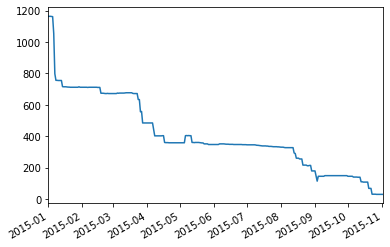

In [16]:
#Counting how many records per day
df['date'].value_counts().plot()

Based on this chart, we can see a decrease in maintenance records throughout 2015. Some speculations could be that: <br> 1) January has the highest number of maintenance records, which may be due to the severe wear and tear from winter (Nov-Jan)? <br> 2) maybe the company conduct major maintenance earlier in the year so trucks can run smoothly with minimal issues throughout the year?<br> I'm not so sure yet but as ambiguous as the data provided, with no information on location and no descriptive feature names, this is my early speculations.

### Feature Engineering

In [17]:
#Splitting data into year, month, day in their own columns
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Year,Month,Day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1


In [18]:
#Checking number of failures vs non-failures
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

Through checking the number of recorded failures vs non-failures recorded in our labeled target: "failure", our data is imbalanced with significantly more records of non-failures vs. failures. 

### Data manipulation/extraction to prepare for visualizations

In [19]:
#Counting the number of trips each device made
trip_count = df['device'].value_counts()
trip_count

S1F0KYCR    304
Z1F0Q8RT    304
Z1F0QL3N    304
Z1F0KJDS    304
S1F0EGMT    304
           ... 
S1F0BN0S      5
Z1F0LJTD      5
W1F0ED5X      5
S1F04KSC      4
W1F0WJFT      3
Name: device, Length: 1168, dtype: int64

In [20]:
#Group by devices with the most recent recording
df2 = df.groupby('device').last().reset_index()
df2.shape

(1168, 15)

In [21]:
#Checking the updated number of failures vs. non-failures
df2['failure'].value_counts()

0    1067
1     101
Name: failure, dtype: int64

In [22]:
df2.head()

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Year,Month,Day
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,2015,1,6
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,2015,5,11
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,2015,1,6
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,2015,2,17
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,2015,1,6


In [23]:
#Creating dataframe with records of number of trips each device has made
trip = pd.DataFrame([df['device'].value_counts()]).T.reset_index()
trip.columns = ['device', 'trip_count']
trip

,device,trip_count
0,S1F0KYCR,304
1,Z1F0Q8RT,304
2,Z1F0QL3N,304
3,Z1F0KJDS,304
4,S1F0EGMT,304
...,...,...
1163,S1F0BN0S,5
1164,Z1F0LJTD,5
1165,W1F0ED5X,5
1166,S1F04KSC,4


In the table presented above, I noticed that the first 3 digits in the device serial numbers are common throughout all serial numbers. Based on my knowledge of manufactured products (from working in medical devices), there are often a part of the serial number that refers to either a specific model or product line so I am going to assume that the first 3 digits of each serial number identify the truck models.

In [24]:
#Extracting the first 3 digits of each device serial number since they are repeated throughout different serial numbers, 
#possibly indicating truck "models"
serial = df2['device'].apply(lambda x: x[:3])
serial_num = pd.DataFrame(serial)
serial_num.columns = ['serial']

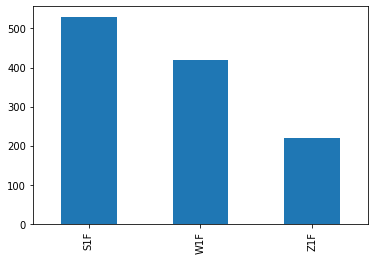

In [25]:
#Determine the number of devices in each group of "model"
serial.value_counts().plot(kind = 'bar');

In [26]:
#Merge number of trips made per device with dataframe
df3 = df2.merge(trip, on = 'device')
df3[df3['device'] == 'W1F0FY92']

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Year,Month,Day,trip_count
567,W1F0FY92,2015-11-02,0,128174672,0,1,6,15,356320,0,0,1,2015,11,2,304


In [27]:
#Merge the first 3 values of serial number with dataframe
df4 = pd.concat([df3,serial_num], axis = 1, sort = False)
df4.head()

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Year,Month,Day,trip_count,serial
0,S1F01085,2015-01-06,0,128832128,56,0,52,6,409404,0,0,7,2015,1,6,6,S1F
1,S1F013BB,2015-05-11,0,115676688,0,0,0,5,689161,0,0,0,2015,5,11,6,S1F
2,S1F0166B,2015-01-06,0,7441792,0,3,0,6,404786,0,0,0,2015,1,6,6,S1F
3,S1F01E6Y,2015-02-17,0,147350000,0,0,0,12,259491,0,0,0,2015,2,17,48,S1F
4,S1F01JE0,2015-01-06,0,185424928,0,0,0,6,412151,0,0,0,2015,1,6,6,S1F


In [28]:
#Checking if the count for month and year with records
print (df3['Month'].value_counts())
print (df['Year'].value_counts())

1     399
3     184
8     150
10    115
4     112
5      72
2      46
9      38
11     31
7      15
6       6
Name: Month, dtype: int64
2015    124494
Name: Year, dtype: int64


In [29]:
#Checking correlation between failed devices with month
failed_months = df4[df4['failure'] == 1]
failed_months['Month'].value_counts()

1     24
5     18
7     14
2     14
4      9
3      9
6      6
8      4
10     3
Name: Month, dtype: int64

The table above confirmed the first chart in line 16, where the highest number of records are in the earlier months witha decrease throughout the year.

<function matplotlib.pyplot.show(*args, **kw)>

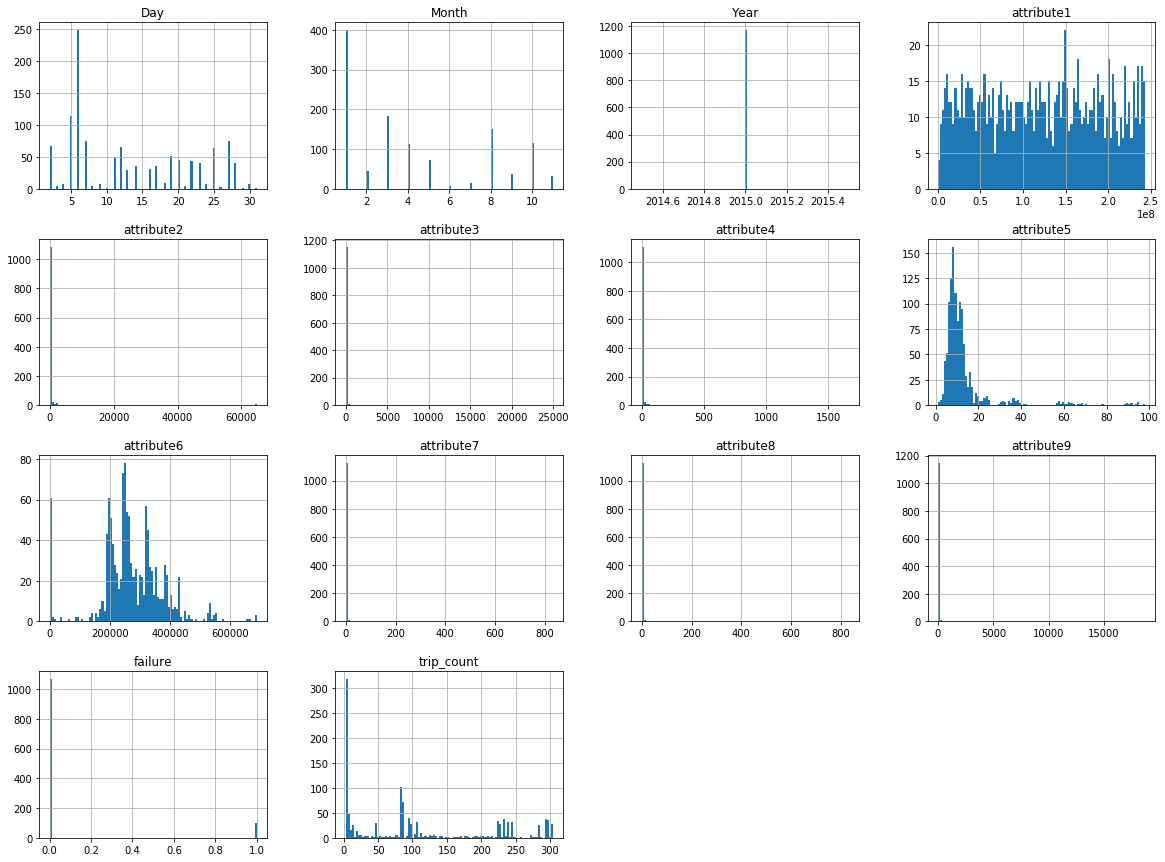

In [30]:
#Vieing distribution of each attribute
df4.hist(bins=100, figsize=(20,15))
plt.show

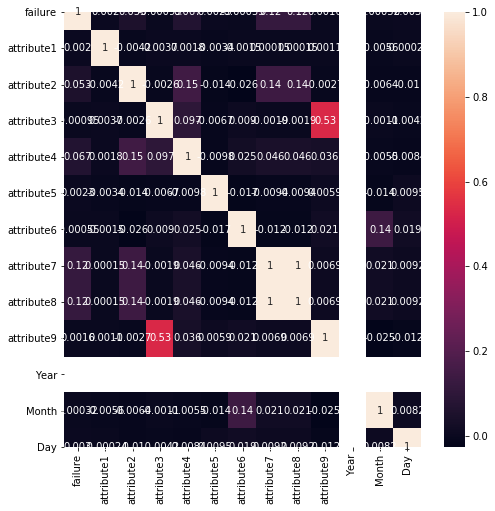

In [31]:
#Plotting correlations
fig = plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(),annot = True);

According to this correlation chart, it confirmed the strong correlation between "attribute3" and "attribute9". However, it also indicates a 1-to-1 correlation between "attribute7" and "attribute8" with identical data.

### Preparing Data

Since there is an imbalance in the labeled target data, we will undersample the amount of working devices to gather an even number of working and failing devices. 

In [32]:
#Split dataframe into failed vs working devices
failed_devices = df4[df4['failure'] == 1]
working_devices = df4[df4['failure'] == 0]

In [33]:
#Randomly select 250 working devices for undersampling
worked_device_adj = working_devices.sample(n = 250)
worked_device_adj

,device,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Year,Month,Day,trip_count,serial
417,S1F10QH3,2015-01-05,0,222458224,0,0,0,6,228524,0,0,0,2015,1,5,5,S1F
800,W1F0Z4X0,2015-01-07,0,185269928,0,0,1,7,375196,6,6,0,2015,1,7,7,W1F
213,S1F0R2CW,2015-01-06,0,31531304,0,0,0,9,221610,0,0,0,2015,1,6,6,S1F
329,S1F0SBLG,2015-01-06,0,11166184,0,0,0,7,194590,0,0,0,2015,1,6,6,S1F
335,S1F0T1AC,2015-01-13,0,114466448,7024,0,24,9,247642,0,0,0,2015,1,13,13,S1F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,W1F14HAQ,2015-04-16,0,112350104,0,0,0,9,431271,0,0,0,2015,4,16,106,W1F
766,W1F0X5L8,2015-03-27,0,125108768,0,0,0,11,248692,0,0,0,2015,3,27,86,W1F
445,S1F11KQW,2015-08-12,0,208953016,0,0,0,7,228047,0,0,0,2015,8,12,202,S1F
516,S1F13HPR,2015-10-19,0,40769616,0,0,0,8,258279,0,0,0,2015,10,19,292,S1F


In [34]:
#Append the smaller dataframe of working devices with failed devices
df5 = worked_device_adj.append(failed_devices).reset_index()

## Building the model

In [35]:
#Assigning labeled target 'failure' to variable y and the rest of the attibutes to variable x 
#and dropping unnecessary attributes or duplicated attribute
y, x = df5['failure'], df5.drop(['failure', 'device', 'index', 'attribute8', 'date'], axis = 1)

In [36]:
#Setting dummy variables to categorical attibutes
X = pd.get_dummies(x, drop_first = True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [39]:
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
log = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [40]:
algorithms = [g, b, k, log, dtc, rfc, gbc]
names = ['Gaussian', 'Bernoulli', 'KNearest', 'Log', 'DecisionTreeClass', 'RandomForestClass', 'GradientBoostingClassifier']

In [41]:
#Splitting train and test data with 20% of data set reserved for test set since the data set is small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [42]:
#Function for model predictions
def classification():
    accuracy = []
    precision = []
    recall = []
    f1 =[]
    for i in range(len(algorithms)):
        algorithms[i].fit(X_train, y_train) 
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y_test, algorithms[i].predict(X_test)))
        precision.append(precision_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
        recall.append(recall_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
        f1.append(f1_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
    
    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [43]:
classification()

,Accuracy,Precision,Recall,F1
Gaussian,0.760563,0.875000,0.575000,0.559006
Bernoulli,0.830986,0.813910,0.745588,0.767974
KNearest,0.718310,0.623016,0.560784,0.555138
Log,0.760563,0.875000,0.575000,0.559006
DecisionTreeClass,0.901408,0.874762,0.885784,0.879981
RandomForestClass,0.901408,0.894880,0.855392,0.872072
GradientBoostingClassifier,0.929577,0.908571,0.920588,0.914272
